## Stock Data Forecasting Using Deep Learning with Backtesting Strategies
### In this code we are showing EDA

### Group 7
#### Vamshi Kumar Konduru, 11516045
#### Harshitha Rangineni, 11504745
#### Anusha Vanga, 11501693
#### Mallikarjun Pandilla, 11519831

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
sns.set_style('whitegrid')
%matplotlib inline
import datetime
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
Tech_list = ['AAPL', 'GOOG', 'CSCO', 'DPZ']
#now we are setting end and start time for data
# defining dates
start= datetime(2011, 1, 1) #"2011–01–01"
end= datetime(2021, 12, 30) #"2021–12–30"
#  extracting data and creating variables
for stock in Tech_list:
    globals()[stock] = web.DataReader(stock,"yahoo",start,end)

In [3]:
Company_list = [AAPL, GOOG, CSCO, DPZ]
company_name = ['AAPL', 'GOOG', 'CSCO', 'DPZ']
for company, comp_name in zip(Company_list,company_name):
    company["company_name"] = comp_name
    
df = pd.concat(Company_list,axis=0)
df.head(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.033263,AAPL
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.085627,AAPL
2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.168128,AAPL
2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.159911,AAPL
2011-01-07,12.012500,11.853571,11.928214,12.004286,311931200.0,10.232668,AAPL
2011-01-10,12.258214,12.041786,12.101071,12.230357,448560000.0,10.425374,AAPL
2011-01-11,12.320000,12.123929,12.317143,12.201429,444108000.0,10.400713,AAPL
2011-01-12,12.301071,12.214286,12.258929,12.300714,302590400.0,10.485349,AAPL
2011-01-13,12.380000,12.280357,12.327143,12.345714,296780400.0,10.523706,AAPL


In [4]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.033263,AAPL
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.085627,AAPL
2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.168128,AAPL
2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.159911,AAPL
2011-01-07,12.012500,11.853571,11.928214,12.004286,311931200.0,10.232668,AAPL


In [5]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2768.000000,2768.000000,2768.000000,2768.000000,2.768000e+03,2768.000000
mean,46.168137,45.224235,45.691126,45.716462,2.403769e+08,43.694028
std,38.700666,37.809505,38.243650,38.281633,1.969997e+08,38.649275
min,11.346429,11.089286,11.310000,11.261429,4.100000e+07,9.599445
25%,20.658928,20.353125,20.518036,20.457232,1.061621e+08,17.666212
50%,29.981250,29.561250,29.756250,29.815000,1.666698e+08,27.386380
75%,51.439375,50.568125,50.934374,51.013751,3.132745e+08,49.508019
max,182.130005,178.529999,181.119995,180.330002,1.880998e+09,179.289444


In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2768 entries, 2011-01-03 to 2021-12-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          2768 non-null   float64
 1   Low           2768 non-null   float64
 2   Open          2768 non-null   float64
 3   Close         2768 non-null   float64
 4   Volume        2768 non-null   float64
 5   Adj Close     2768 non-null   float64
 6   company_name  2768 non-null   object 
dtypes: float64(6), object(1)
memory usage: 173.0+ KB


In [7]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2768 entries, 2011-01-03 to 2021-12-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          2768 non-null   float64
 1   Low           2768 non-null   float64
 2   Open          2768 non-null   float64
 3   Close         2768 non-null   float64
 4   Volume        2768 non-null   float64
 5   Adj Close     2768 non-null   float64
 6   company_name  2768 non-null   object 
dtypes: float64(6), object(1)
memory usage: 173.0+ KB


In [8]:
CSCO.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2768 entries, 2011-01-03 to 2021-12-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          2768 non-null   float64
 1   Low           2768 non-null   float64
 2   Open          2768 non-null   float64
 3   Close         2768 non-null   float64
 4   Volume        2768 non-null   float64
 5   Adj Close     2768 non-null   float64
 6   company_name  2768 non-null   object 
dtypes: float64(6), object(1)
memory usage: 173.0+ KB


In [9]:
DPZ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2768 entries, 2011-01-03 to 2021-12-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          2768 non-null   float64
 1   Low           2768 non-null   float64
 2   Open          2768 non-null   float64
 3   Close         2768 non-null   float64
 4   Volume        2768 non-null   float64
 5   Adj Close     2768 non-null   float64
 6   company_name  2768 non-null   object 
dtypes: float64(6), object(1)
memory usage: 173.0+ KB


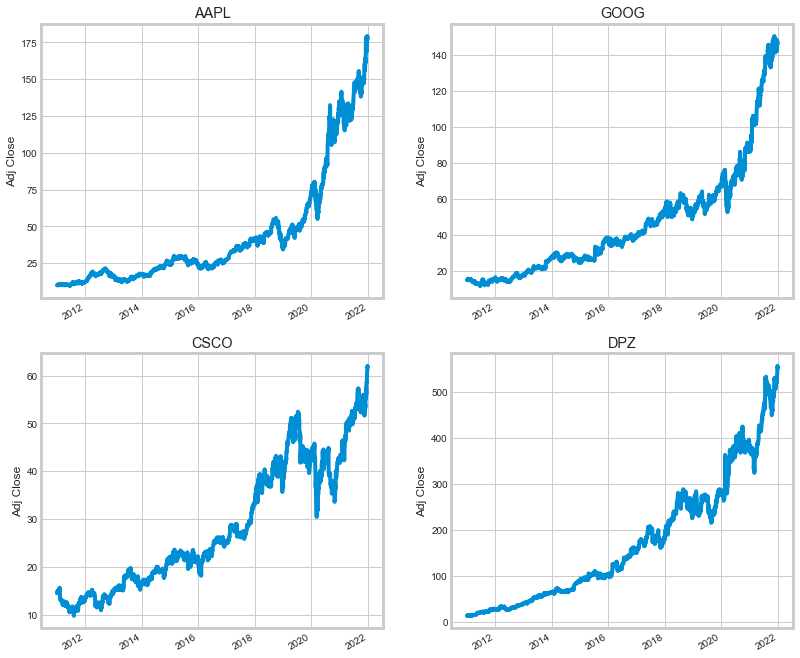

In [10]:
# visualising closing price
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(Company_list, 1):
    plt.subplot(2, 2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{Tech_list[i - 1]}")

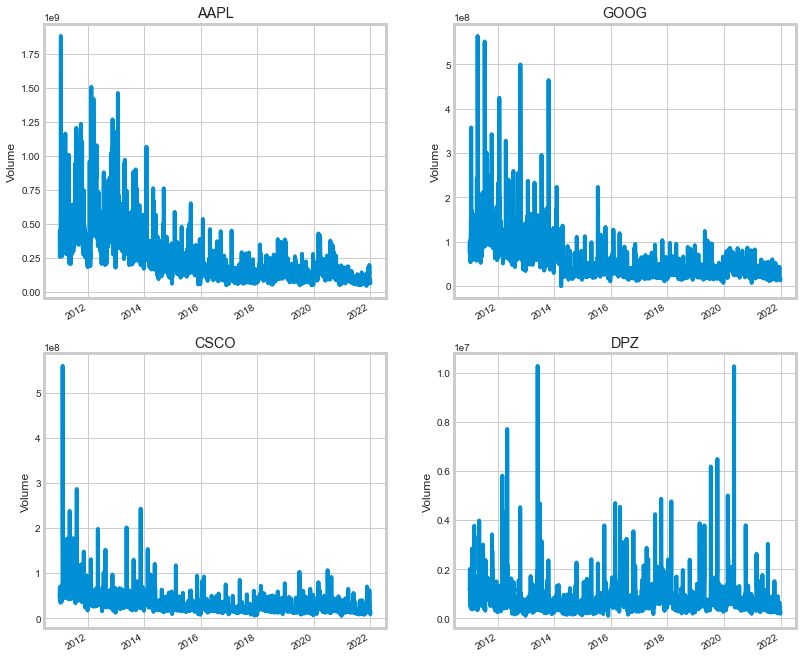

In [11]:
# visualizing total volumes
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(Company_list, 1):
    plt.subplot(2, 2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{Tech_list[i - 1]}")

In [12]:
ma_day = [10, 20, 50]

#calculating the moving averabe of the resp.companies
for ma in ma_day:
    for company in Company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [13]:
print(GOOG.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


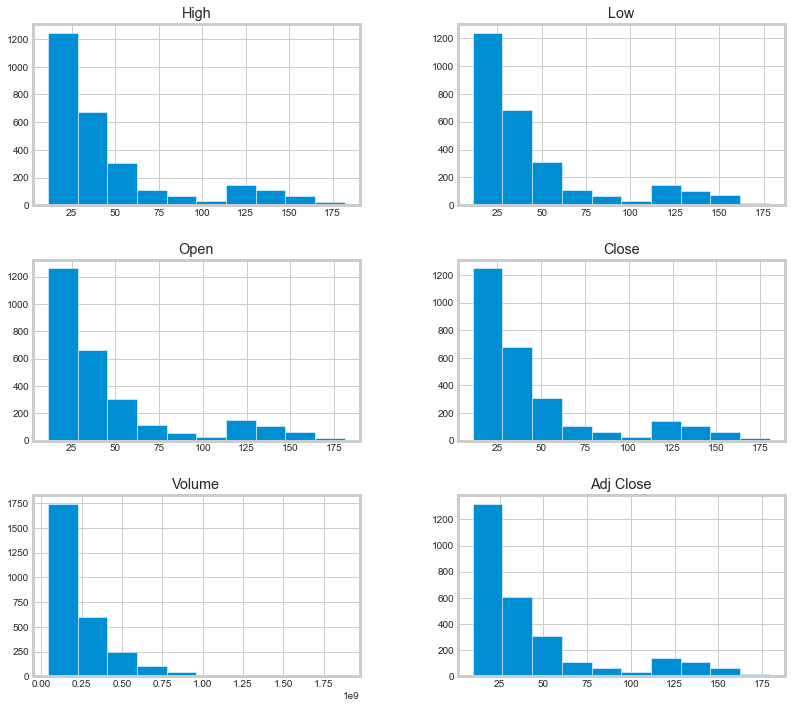

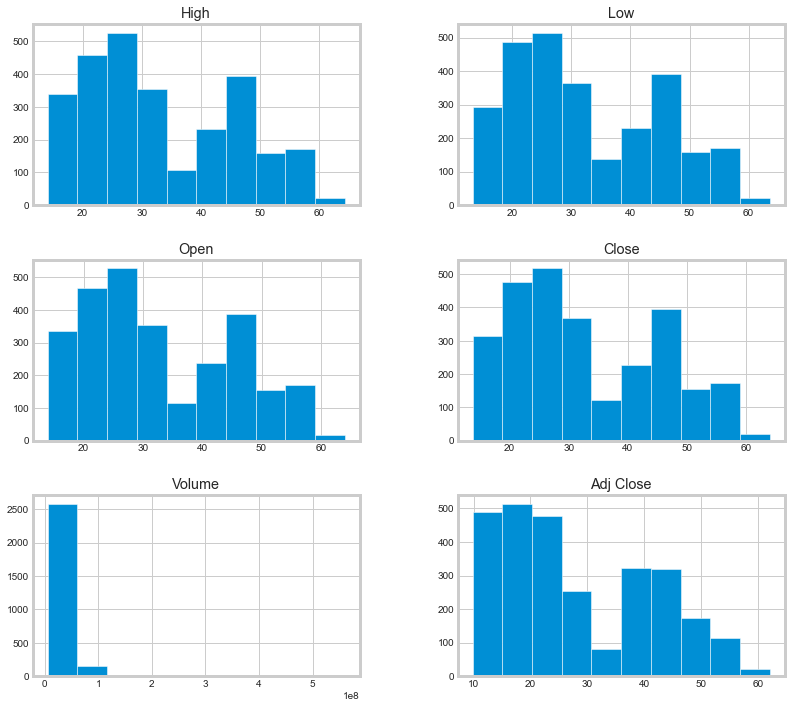

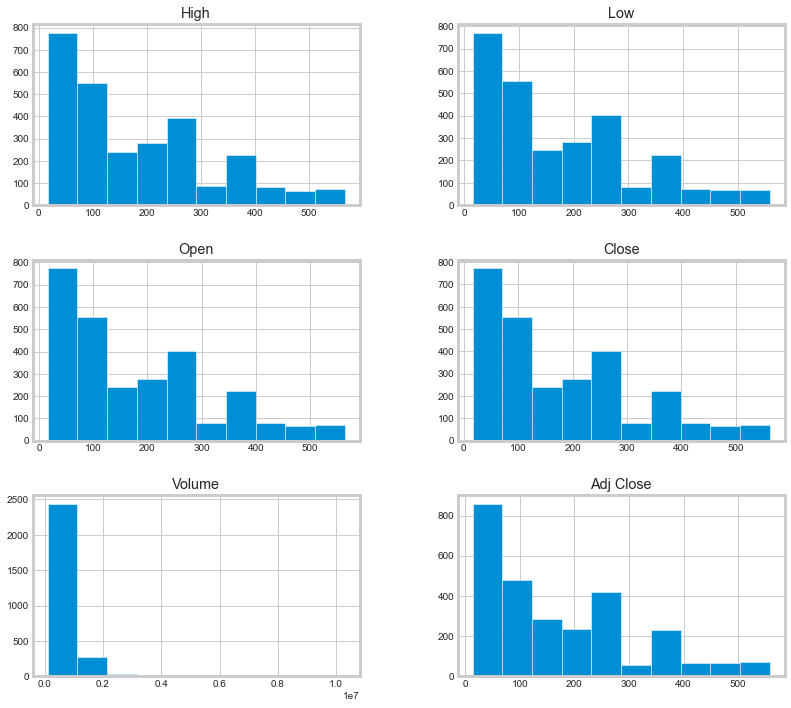

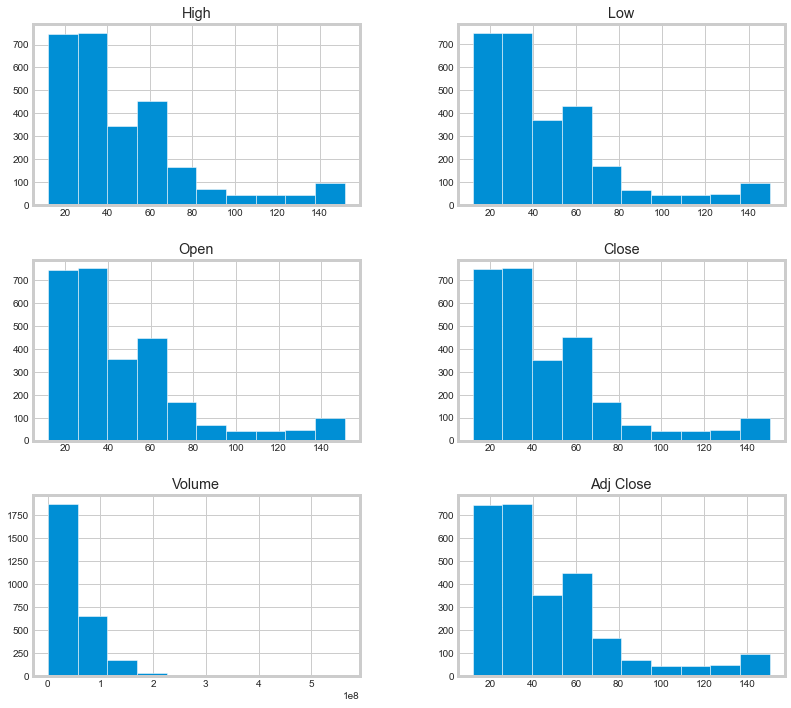

In [14]:
# here we are visualising the additional moving averages
df.groupby("company_name").hist(figsize=(12, 12));

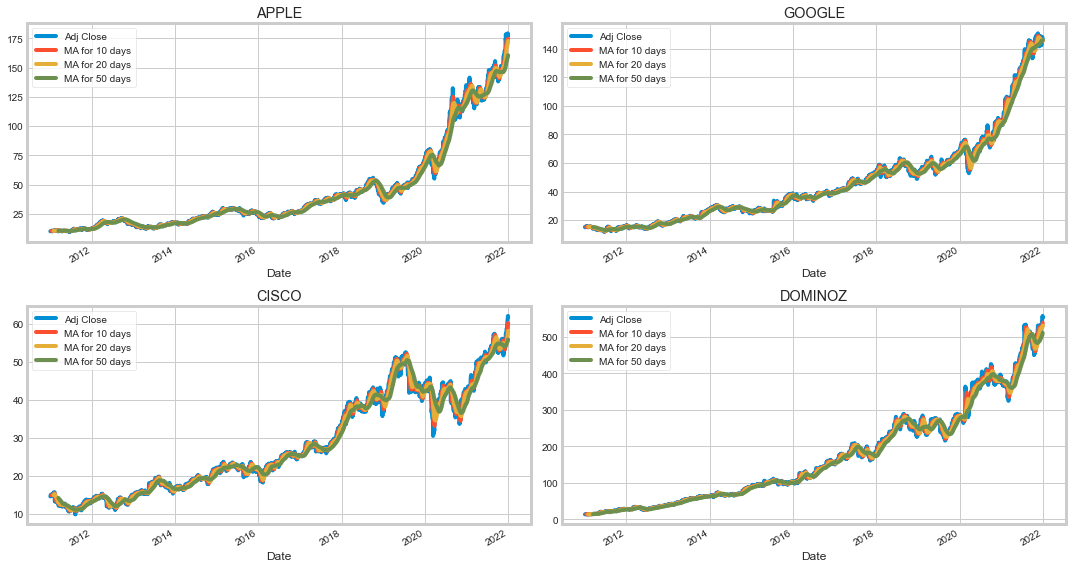

In [15]:
# here we are visualising three important moving averages of all the company
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

CSCO[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('CISCO')

DPZ[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('DOMINOZ')

fig.tight_layout()

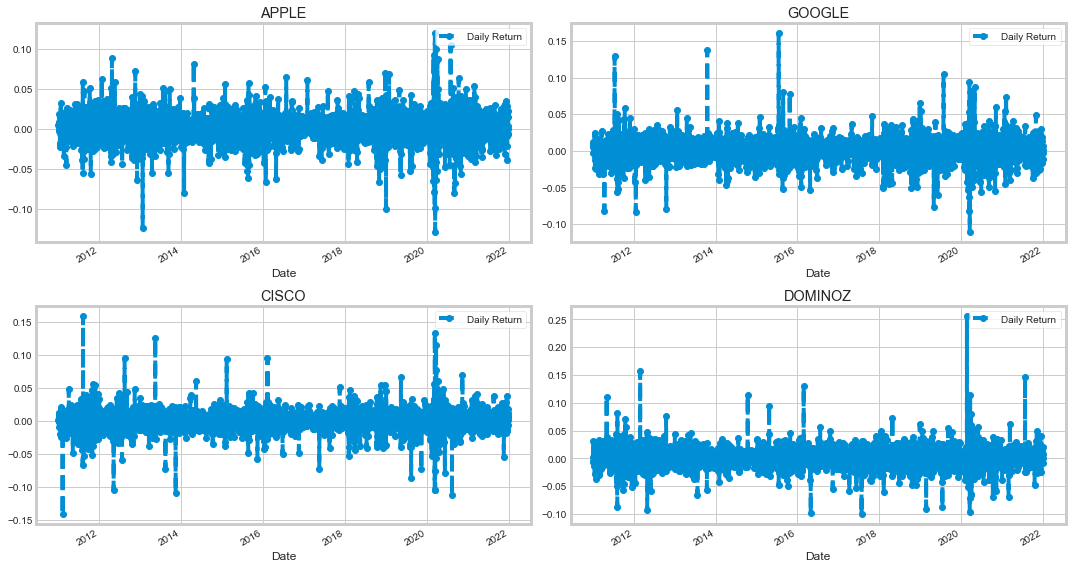

In [16]:
for company in Company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# plotting daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

CSCO['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('CISCO')

DPZ['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('DOMINOZ')

fig.tight_layout()

In [17]:
# extracting all the closing prices and converting to df
closing_df = web.DataReader(Tech_list, 'yahoo', start, end)['Adj Close']
closing_df.head()

Symbols,AAPL,GOOG,CSCO,DPZ
Date,,,,
2011-01-03,10.033263,15.052330,14.550560,13.614460
2011-01-04,10.085625,14.996788,14.571866,13.514168
2011-01-05,10.168127,15.169890,14.749396,13.940408
2011-01-06,10.159908,15.280226,14.877225,13.873544
2011-01-07,10.232666,15.353451,14.891421,13.898620


In [18]:
# here we are Making a new tech returns DataFrame for anaylsis
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,CSCO,DPZ
Date,,,,
2011-01-03,NaN,NaN,NaN,NaN
2011-01-04,0.005219,-0.003690,0.001464,-0.007367
2011-01-05,0.008180,0.011543,0.012183,0.031540
2011-01-06,-0.000808,0.007273,0.008667,-0.004796
2011-01-07,0.007161,0.004792,0.000954,0.001807


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


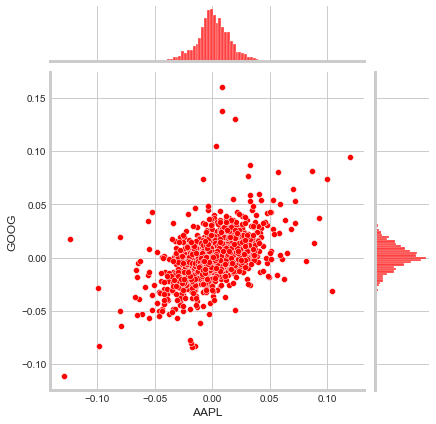

In [19]:
# here We'll use joinplot to compare the daily returns of apple and google
sns.jointplot('AAPL', 'GOOG', tech_rets, kind='scatter', color = "red")

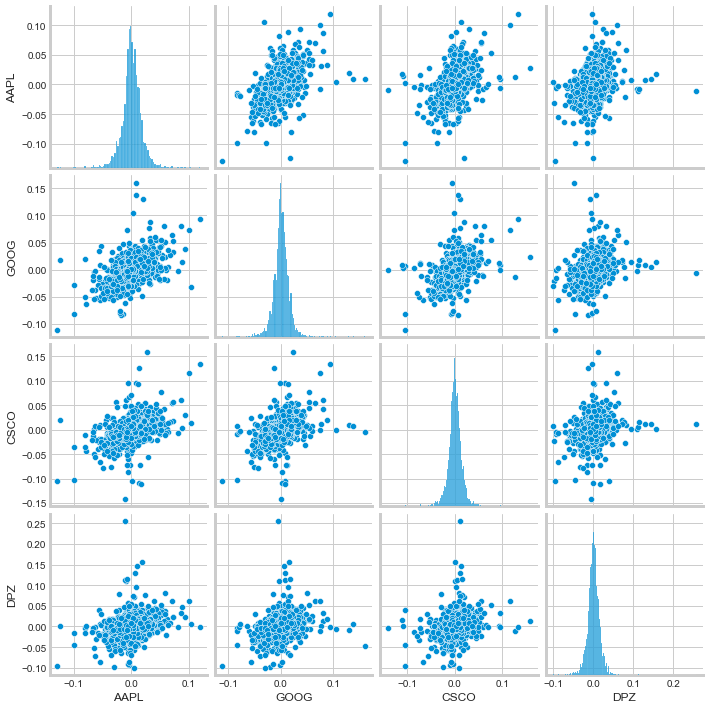

In [20]:
# Here we are simply calling pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons
sns.pairplot(tech_rets, kind='scatter')

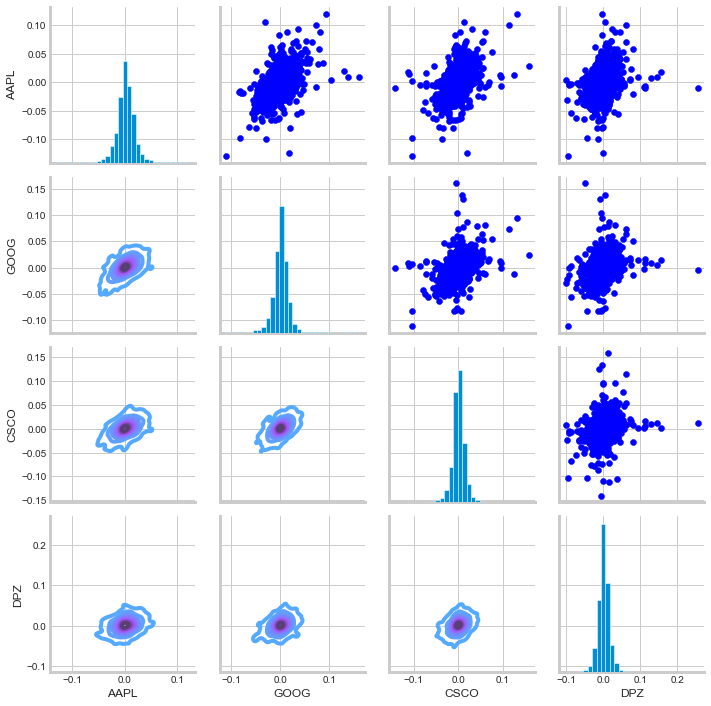

In [21]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='blue')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

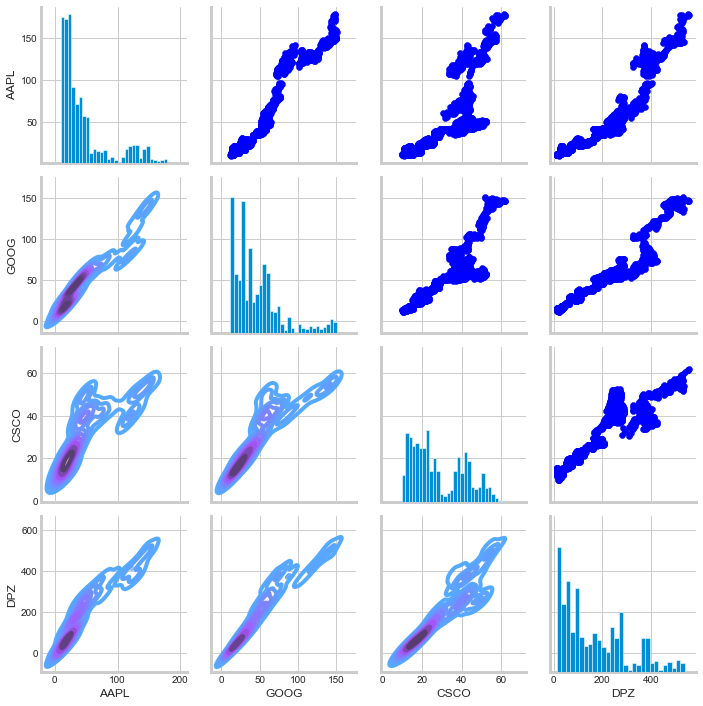

In [22]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='blue')

# We can also define the lower triangle in the figure, including the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

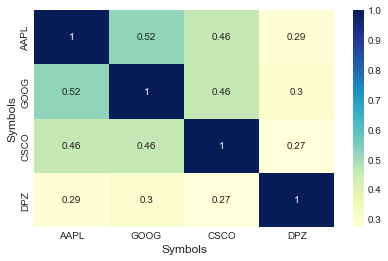

In [23]:
# Here we are using seabron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap="YlGnBu")

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

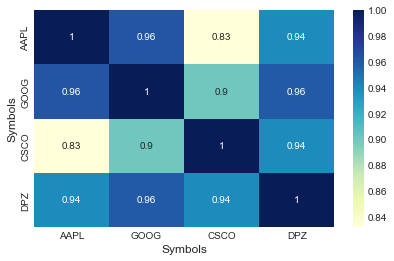

In [24]:
sns.heatmap(closing_df.corr(), annot=True, cmap="YlGnBu")

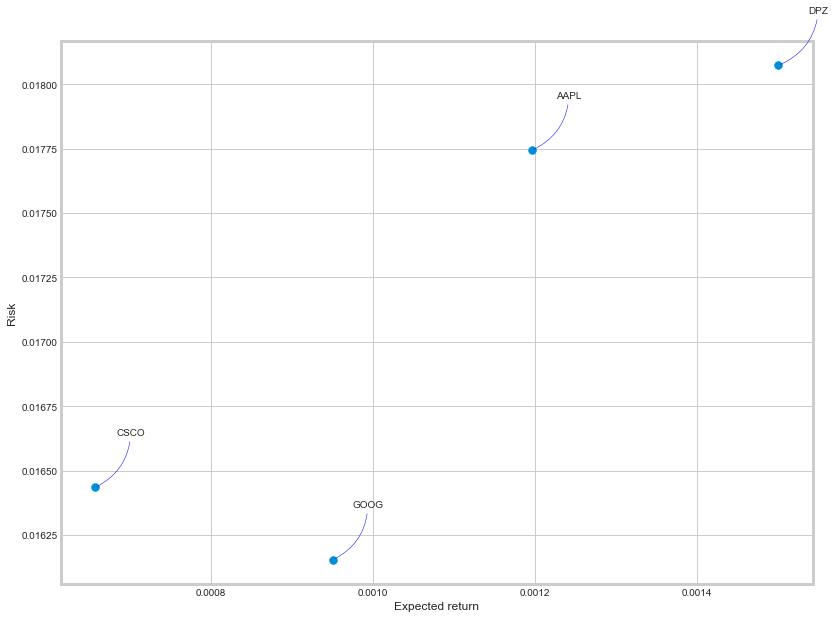

In [25]:
# Here e are defining a new DataFrame as a cleaned version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))